TR2
	 Shading done
	 PV simulation finished
Done


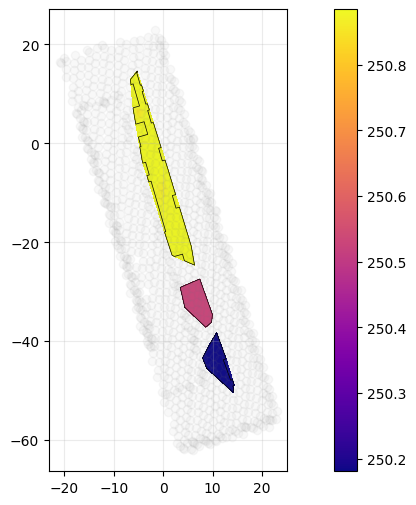

In [1]:
from Classes.DataPreparator import DataPreparator
from Classes.SolarEstimator import SolarEstimator
import pandas as pd

buildings_path = "Sample/Data/Buildings lists/Buildings Campus Terrassa.csv"
cadaster_path = "Sample/Data/Cadaster files"
LiDAR_path = "Sample/Data/LiDAR files"
output_path = "Sample/Results/Data Preparation"

def prepare_alldata(data_prepPaths, LiDAR_target, buildings_source=4326, cadstre_source=4326, las2txtPath="C:/LAStools"):
    dataprep = DataPreparator(data_prepPaths[0], data_prepPaths[1], data_prepPaths[2], data_prepPaths[3])
    dataprep.prepare_buildings(source=buildings_source, target=LiDAR_target)
    dataprep.prepare_cadaster(source=cadstre_source, target=LiDAR_target)
    dataprep.prepare_LiDAR(las2txtPath=las2txtPath)
    print("\t Data preparation done")

def simulateBuilding(building, simulationPaths, crsCadaster, crsLiDAR):
    print(building.identifier.values[0])
    solarestimator = SolarEstimator(building, simulationPaths[0], crsLiDAR=crsLiDAR, square_side=500, temp_path="Sample/Results/_Temp")
    solarestimator.loadData(simulationPaths[1], simulationPaths[2], simulationPaths[3], simulationPaths[4])
    # print("\t Starting simulation")

    # solarestimator.segmentLiDAR(square_side=500)   
    # solarestimator.createNeighborhood(LAStoolsPath="C:/LAStools", export3D=True) 
    # print("\t Square neighborhood generation done")

    # solarestimator.identifyPlanes(minGlobalPercentage=0.05, minPartialPercentage=0.5, heightThreshold=0.5, distanceThreshold=0.1, ransacIterations=100, densityMultiplier=0.5, stoppingPercentage=0.2, pdfExponent=2)
    # print("\t Plane identification done")

    # solarestimator.processPlanes(crsCadaster=crsCadaster, generateFigures=True, slidingHole=0.75, minHoleSide = 2.5)
    # print("\t Plane processing done")

    solarestimator.computeShading(generateFigures=False, Nsamples=25, div=2, bufferSize=1)
    print("\t Shading done")

    solarestimator.simulatePySAM(simulationPaths[5], generateFigures=False)
    solarestimator.plotEnergyMap()
    print("\t PV simulation finished")

if __name__ =="__main__":
    # # For data preparation
    #     # To modify
    # buildings_path = "Sample/Data/Buildings lists/Buildings Campus Terrassa.csv"
    # cadaster_path = "Sample/Data/Cadaster files"
    # LiDAR_path = "Sample/Data/LiDAR files"
    # output_path = "Sample/Results/Data Preparation"
    #     # Do not touch
    # data_prepPaths = [buildings_path, cadaster_path, LiDAR_path, output_path]
    # prepare_alldata(data_prepPaths, LiDAR_target=25831)

    # For PV simulation
        # To modify
    buildings_info_path = r"C:\Users\jaasb\INVESTIGO\Github\solar_potencial_estimation_v2\Sample\Results\Data Preparation\Buildings\Buildings_filtered.csv"
    buildingsID = ['TR2']

    LiDAR_info_path = "Sample/Results/Data Preparation/LiDAR/LiDAR_Limits.csv"
    cadaster_info_path = "Sample/Results/Data Preparation/Cadaster/Cadaster_Limits.csv"
    LiDAR_path = "Sample/Data/LiDAR files"
    cadaster_path = "Sample/Data/Cadaster files"
    tmyfile = "Sample/Data/TMY_Terrassa-2018.csv"
    output_path = "Sample/Results"

    crsCadaster=4326
    crsLiDAR=25831

        # Do not touch
    simulationPaths = [output_path, LiDAR_info_path, cadaster_info_path, LiDAR_path, cadaster_path, tmyfile]
    buildings = pd.read_csv(buildings_info_path) 
    for buildingID in buildingsID:
        building = buildings[buildings.identifier == buildingID].reset_index(drop=True)
        simulateBuilding(building, simulationPaths, crsCadaster, crsLiDAR)
    
    print("Done")

In [8]:
buildings

,identifier,lat,long,x,y
0,eP-EAZK-001,48.989117,17.529296,-533550.698635,-1.190366e+06
1,eP-EAZK-002,49.354142,18.231031,-478911.148623,-1.154587e+06
2,eP-EAZK-003,49.352665,18.240200,-478261.692215,-1.154808e+06
3,eP-EAZK-004,48.988061,17.718152,-519802.405316,-1.191784e+06
4,eP-EAZK-005,49.121080,17.763475,-515134.282103,-1.177363e+06
...,...,...,...,...,...
329,eP-EAZK-372,49.519684,17.929714,-499056.272339,-1.134322e+06
330,eP-EAZK-373,49.470677,17.965162,-496988.800251,-1.139981e+06
331,eP-EAZK-374,49.478430,17.968363,-496680.453427,-1.139143e+06
332,eP-EAZK-376,49.340695,17.999439,-495804.108123,-1.154601e+06


# **Data preparation**

In [1]:
from Classes.DataPreparator import DataPreparator

buildings_path = "Sample/Data/Buildings lists/Buildings Campus Terrassa.csv"
cadaster_path = "Sample/Data/Cadaster files"
LiDAR_path = "Sample/Data/LiDAR files"
output_path = "Sample/Results/Data Preparation"

dataprep = DataPreparator(buildings_path, cadaster_path, LiDAR_path, output_path)
dataprep.prepare_buildings(source=4326, target=25831)
dataprep.prepare_cadaster(source=4326, target=25831)
dataprep.prepare_LiDAR(las2txtPath="C:/LAStools")

C:\Users\jaasb\AppData\Roaming\Python\Python311\site-packages\pandas\core\algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


# **Solar energy estimation**

In [3]:
from Classes.SolarEstimator import SolarEstimator
import pandas as pd

srcCadaster=4326
srcLiDAR=25831

LiDAR_info_path = "Sample/Results/Data Preparation/LiDAR/LiDAR_Limits.csv"
cadaster_info_path = "Sample/Results/Data Preparation/Cadaster/Cadaster_Limits.csv"
cadaster_path = "Sample/Data/Cadaster files"
LiDAR_path = "Sample/Data/LiDAR files"
tmyfile = "Sample/Data/TMY_Terrassa-2018.csv"
buildings_info_path = "Sample/Results/Data Preparation/Buildings/Buildings_filtered.csv"

output_path = "Sample/Results"

buildings = pd.read_csv(buildings_info_path) 
buildingsID = buildings.identifier.values

for buildingID in buildingsID[1:]:
    building = buildings[buildings.identifier == buildingID].reset_index(drop=True)
    print(buildingID)
    
    solarestimator = SolarEstimator(building, output_path, srcLiDAR=srcLiDAR, square_side=500, temp_path="Sample/Results/_Temp")
    solarestimator.loadData(LiDAR_info_path, cadaster_info_path, LiDAR_path, cadaster_path)
    solarestimator.segmentLiDAR(square_side=500)   
    solarestimator.createNeighborhood(LAStoolsPath="C:/LAStools", export3D=True) 

    solarestimator.identifyPlanes(minGlobalPercentage=0.05, minPartialPercentage=0.5, heightThreshold=0.5, distanceThreshold=0.1, ransacIterations=100, densityMultiplier=0.75, stoppingPercentage=0.33)
    print("\t Plane identification done")

    solarestimator.processPlanes(srcCadaster=srcCadaster, generateFigures=True, slidingHole=0.75, minHoleSide = 2.5, minDensityDelete=0.1)
    print("\t Plane processing done")

    # solarestimator.computeShading(generateFigures=False, Nsamples=25, div=2, bufferSize=1, shadeInside=True)
    # print("\t Shading done")
    # solarestimator.simulatePySAM(tmyfile, generateFigures=False)
    # solarestimator.plotEnergyMap()


TR2


KeyboardInterrupt: 

In [8]:
buildings

,identifier,lat,long,x,y
0,TR1,41.564295,2.023016,418538.397309,4.601863e+06
1,TR2,41.564435,2.023455,418575.251796,4.601878e+06
2,TR3,41.563835,2.023005,418536.925437,4.601812e+06
3,TR4,41.563526,2.023053,418540.562914,4.601778e+06
4,TR45,41.563348,2.023852,418606.986342,4.601757e+06
5,TR5,41.562886,2.023557,418581.805340,4.601706e+06
6,TR6,41.562543,2.023541,418580.032596,4.601668e+06
7,TR8,41.568555,2.023512,418585.172181,4.602336e+06
8,TR9,41.563769,2.021305,418395.131797,4.601806e+06
9,TR10,41.563885,2.021969,418450.605423,4.601818e+06


In [4]:
from Classes.SolarEstimator import SolarEstimator
import pandas as pd

cadaster=3035
lidar=5514

LiDAR_info_path = "Sample/Results/Data Preparation/LiDAR/LiDAR_Limits.csv"
cadaster_info_path = "Sample/Results/Data Preparation/Cadaster/Cadaster_Limits.csv"
cadaster_path = "Sample/Data/Cadaster files"
LiDAR_path = "Sample/Data/LiDAR files"
tmyfile = "Sample/Data/TMY_Terrassa-2018.csv"
buildings_info_path = r"C:\Users\jaasb\INVESTIGO\BEE Group\eplanet shared\Programa Final\Results\Data Preparation\Buildings\Buildings_filtered.csv"

output_path = "Sample/Results"

buildings = pd.read_csv(buildings_info_path) 

buildingsID = ['eP-EAZK-050', 'eP-EAZK-076', 'eP-EAZK-085', 'eP-EAZK-162', 'eP-EAZK-163', 'eP-EAZK-165']

for buildingID in buildingsID[1:2]:
    building = buildings[buildings.identifier == buildingID].reset_index(drop=True)
    print(buildingID)
    
    solarestimator = SolarEstimator(building, output_path, crsLiDAR=lidar, square_side=500, temp_path="Sample/Results/_Temp")
    solarestimator.loadData(LiDAR_info_path, cadaster_info_path, LiDAR_path, cadaster_path)
    # solarestimator.segmentLiDAR(square_side=500)   
    # # solarestimator.createNeighborhood(LAStoolsPath="C:/LAStools", export3D=True) 

    # solarestimator.identifyPlanes(minGlobalPercentage=0.05, minPartialPercentage=0.5, heightThreshold=0.5, distanceThreshold=0.1, ransacIterations=100, densityMultiplier=0.5, stoppingPercentage=0.2, pdfExponent=2)
    # print("\t Plane identification done")

    solarestimator.processPlanes(crsCadaster=cadaster, generateFigures=True, slidingHole=0.75, minHoleSide = 2.5)
    print("\t Plane processing done")

    # solarestimator.computeShading(generateFigures=False, Nsamples=25, div=2, bufferSize=1, shadeInside=True)
    # print("\t Shading done")
    # solarestimator.simulatePySAM(tmyfile, generateFigures=False)
    # solarestimator.plotEnergyMap()


eP-EAZK-076
	 Plane processing done


In [8]:
from Classes.SolarEstimator import SolarEstimator
import pandas as pd

cadaster=3035
lidar=5514

LiDAR_info_path = "Sample/Results/Data Preparation/LiDAR/LiDAR_Limits.csv"
cadaster_info_path = "Sample/Results/Data Preparation/Cadaster/Cadaster_Limits.csv"
cadaster_path = "Sample/Data/Cadaster files"
LiDAR_path = "Sample/Data/LiDAR files"
tmyfile = "Sample/Data/TMY_Terrassa-2018.csv"
buildings_info_path = r"C:\Users\jaasb\INVESTIGO\BEE Group\eplanet shared\Programa Final\Results\Data Preparation\Buildings\Buildings_filtered.csv"

output_path = "Sample/Results"

buildings = pd.read_csv(buildings_info_path) 

buildingsID = ['eP-EAZK-050', 'eP-EAZK-076', 'eP-EAZK-085', 'eP-EAZK-162', 'eP-EAZK-163', 'eP-EAZK-165']

for buildingID in buildingsID[0:1]:
    building = buildings[buildings.identifier == buildingID].reset_index(drop=True)
    print(buildingID)
    
    solarestimator = SolarEstimator(building, output_path, srcLiDAR=lidar, square_side=500, temp_path="Sample/Results/_Temp")
    solarestimator.loadData(LiDAR_info_path, cadaster_info_path, LiDAR_path, cadaster_path)
    solarestimator.segmentLiDAR(square_side=500)   
    # solarestimator.createNeighborhood(LAStoolsPath="C:/LAStools", export3D=True) 

    solarestimator.identifyPlanes(minGlobalPercentage=0.05, minPartialPercentage=0.5, heightThreshold=0.5, distanceThreshold=0.1, ransacIterations=100, densityMultiplier=0.5, stoppingPercentage=0.2, pdfExponent=1)
    print("\t Plane identification done")

    # solarestimator.processPlanes(srcCadaster=cadaster, generateFigures=True, slidingHole=0.75, minHoleSide = 2.5)
    # print("\t Plane processing done")

    # solarestimator.computeShading(generateFigures=False, Nsamples=25, div=2, bufferSize=1, shadeInside=True)
    # print("\t Shading done")
    # solarestimator.simulatePySAM(tmyfile, generateFigures=False)
    # solarestimator.plotEnergyMap()

eP-EAZK-050
Building eP-EAZK-050 does not have cadastre info
Split into 3 height groups
Group: 0
	 Starting with 7 points
		 3 points identified, 4 points remaining
		 Found plane. Percentatge remaining: 0.5714285714285714
		 4 points identified, 0 points remaining
		 Found plane. Percentatge remaining: 0.0
	 Run out of iterations. 0 points left
Group: 1
	 Starting with 13 points
		 4 points identified, 9 points remaining
		 Found plane. Percentatge remaining: 0.6923076923076923
		 5 points identified, 4 points remaining
		 Found plane. Percentatge remaining: 0.3076923076923077
		 3 points identified, 1 points remaining
		 Found plane. Percentatge remaining: 0.07692307692307693
	 Run out of iterations. 1 points left
Group: 2
	 Starting with 759 points
		 130 points identified, 629 points remaining
		 Found plane. Percentatge remaining: 0.8287220026350461
		 69 points identified, 560 points remaining
		 Found plane. Percentatge remaining: 0.7378129117259552
		 96 points identified, 464 

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

readFile = r"C:\Users\jaasb\INVESTIGO\BEE Group\eplanet shared\Programa Final\_Final Results\eP-EAZK-055\05 - Shading Matrices\3\Average_3.csv"
saveFile = r"C:\Users\jaasb\INVESTIGO\BEE Group\eplanet shared\Programa Final\_Final Results\eP-EAZK-055\05 - Shading Matrices\3\Average_3.png"

def plotShadingMatrix(readFile, saveFile):
        plt.rcParams['figure.figsize'] = [12,6]
        fig, ax = plt.subplots()
        df_mat = pd.read_csv(readFile)
        df_mat = df_mat.set_index("Unnamed: 0")
        df_mat = df_mat[::-1]
        sc = ax.matshow(df_mat, cmap='viridis_r')

        # Set the x-axis tick labels to be the column names of df_mat
        x_ticks = np.arange(0, len(df_mat.columns), 5)  # Adjust the step as needed
        ax.set_xticks(x_ticks)
        ax.set_xticklabels(df_mat.columns[x_ticks])

        # Set the y-axis tick labels to be the index values of df_mat
        y_ticks = np.arange(0, len(df_mat.index), 3)  # Adjust the step as needed
        ax.set_yticks(y_ticks)
        ax.set_yticklabels(df_mat.index[y_ticks])

        plt.colorbar(sc)

        fig.savefig(saveFile)
        plt.close()


plotShadingMatrix(readFile, saveFile)

In [18]:
import os
basePath = r"C:\Users\jaasb\INVESTIGO\BEE Group\eplanet shared\Programa Final\_Final Results"
buildingsOk = os.listdir(basePath)
for folder in buildingsOk:
    shadingPath = basePath + "/"+folder+"/05 - Shading Matrices"
    if os.path.isdir(shadingPath):
        for planeID in os.listdir(shadingPath):
            readFile = shadingPath + "/" + planeID + "/Average_" +planeID + ".csv"
            saveFile = shadingPath + "/" + planeID + "/Average_" +planeID + ".png"
            plotShadingMatrix(readFile, saveFile)

Since it was thought for all LiDAR data to be in one directory, data has been merged before loading the estimator

In [2]:
import os
import time
from Functions.general_functions import create_output_folder
# Get a list of buildings and select a building for testing

import pandas as pd
buildings_info_path = "Results/Data Preparation/Buildings/Buildings_filtered.csv"
buildings = pd.read_csv(buildings_info_path) 

# This is for peace of mind and ease of debugging
import warnings
warnings.filterwarnings('ignore')

from Classes.SolarEstimator import SolarEstimator

LiDAR_info_path = "Results/Data Preparation/LiDAR/LiDAR_Limits.csv"
cadastre_info_path = "Results/Data Preparation/Cadastre/Cadastre_Limits.csv"
cadastre_path = "Data/v0_1-CZE"
LiDAR_path = "Data/DVDs"
tmyfile = "Data/Zlin_TMY/Zlin_TMY.csv"

output_path = "Results"

FileNotFoundError: [Errno 2] No such file or directory: 'Results/Data Preparation/Buildings/Buildings_filtered.csv'

In [ ]:
buildingsID = ['eP-EAZK-322']

In [ ]:
for buildingID in buildingsID:
    building = buildings[buildings.identifier == buildingID].reset_index(drop=True)
    
    solarestimator = SolarEstimator(building, output_path)
    
    solarestimator.loadData(LiDAR_info_path, cadastre_info_path, LiDAR_path, cadastre_path)

    solarestimator.segmentLiDAR(stl_side=500, partitioned=True)
    solarestimator.generateSTL() 

    solarestimator.identifyPlanes(generateFigures=True, minGlobalPercentage=0.4, minPartialPercentage=0.5, heightThreshold=0.5, distanceThreshold=0.1, 
                                  ransacIterations=20, stoppingPercentage=0.05, pdfExponent=2, deleteFirst=True)
    print("\t Plane identification done")

    solarestimator.processPlanes(generateFigures=True, slidingHole=0.5, minHoleSide = 2.5)
    print("\t Plane processing done")

    solarestimator.computeShading(generateFigures=False, Nsamples=25, div=2, bufferSize=1, shadeInside=True)
    print("\t Shading done")
    solarestimator.simulatePySAM(tmyfile, multipleTilts=False)
    
    del solarestimator

# **Extra code**

## *File management*

In [ ]:
import os
import pandas as pd

directory_path = "Results/Data Preparation/LiDAR/By DVD"

# Get a list of all CSV files in the specified directory
csv_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]

# Check if there are any CSV files in the directory
if not csv_files:
    print("No CSV files found in the specified directory.")

# Initialize an empty dataframe to store the merged data
merged_df = pd.DataFrame()

# Loop through each CSV file and merge it into the main dataframe
for csv_file in csv_files:
    file_path = os.path.join(directory_path, csv_file)
    # Read the CSV file into a dataframe
    df = pd.read_csv(file_path)
    # Merge the dataframe into the main dataframe
    merged_df = pd.concat([merged_df, df], ignore_index=True)

merged_df
merged_df.to_csv("Results/Data Preparation/LiDAR/LiDAR_Limits.csv", index=False)

In [ ]:
import os
import shutil

source_directory = "Data/DVDs/All DVD"
destination_directory = "Data/DVDs"

# Ensure the destination directory exists; create it if not
if not os.path.exists(destination_directory):
    os.makedirs(destination_directory)
    print(f"Created destination directory: '{destination_directory}'")

# Get a list of all files in the source directory
files = [f for f in os.listdir(source_directory) if os.path.isfile(os.path.join(source_directory, f))]

# Move each file to the destination directory
for file in files:
    source_path = os.path.join(source_directory, file)
    destination_path = os.path.join(destination_directory, file)
    shutil.move(source_path, destination_path)
    print(f"Moved: {source_path} -> {destination_path}")

## *If plane identification is split, this helps merging*

In [ ]:
from Functions.general_functions import create_output_folder
import pandas as pd
import os
import shutil

buildingJoin = "eP-EAZK-322"
numberFolders = 8
folderPath = output_path + "/" + buildingJoin

mergedPath = folderPath + "/" + "04 - Plane Processing"
create_output_folder(mergedPath)
create_output_folder(mergedPath + "/01 - Results")

# Plane info
planeList = pd.read_csv(mergedPath +" - còpia/01 - Results/PlaneList_" + buildingJoin + ".csv")

for i in range(numberFolders-1):
    partialPlaneList = pd.read_csv(mergedPath +" - còpia (" + str(i+2) + ")/01 - Results/PlaneList_" + buildingJoin + ".csv")
    planeList = pd.concat([planeList, partialPlaneList])

planeList.to_csv(mergedPath + "/01 - Results/PlaneList_" + buildingJoin + ".csv", index=False)

# Planes points
dir_path = mergedPath +" - còpia/01 - Results/" 
n_planes = len([entry for entry in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, entry))])
currentN = 0

for i in range(n_planes-1):
    src = dir_path + "/" + buildingJoin + "_" + str(i) + ".csv"
    dst = mergedPath + "/01 - Results/" + buildingJoin + "_" + str(currentN) + ".csv"
    currentN = currentN + 1
    shutil.copy(src, dst)

for i in range(numberFolders-1):
    dir_path = mergedPath + " - còpia (" + str(i+2) + ")/01 - Results/" 
    n_planes = len([entry for entry in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, entry))])
    for i in range(n_planes-1):
        src = dir_path + "/" + buildingJoin + "_" + str(i) + ".csv"
        dst = mergedPath + "/01 - Results/" + buildingJoin + "_" + str(currentN) + ".csv"
        currentN = currentN + 1
        shutil.copy(src, dst)